#**Data Preprocessing**

##*Importing Libraries*

In [ ]:
from google.colab import drive
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from scipy.spatial import distance
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score

##*Importing the dataset*

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/group14/classification/nonLinearlySeparable'

/content/drive/My Drive/group14/classification/nonLinearlySeparable


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

# Create an empty list to store DataFrames
data_frames = []

# List of file names, column names, and labels
file_info = [
    {"file_name": "class1_train.txt", "column_names": ["Feature 1", "Feature 2"], "label": 0},
    {"file_name": "class2_train.txt", "column_names": ["Feature 1", "Feature 2"], "label": 1}
]

for info in file_info:
    file_name = info["file_name"]
    column_names = info["column_names"]
    label = info["label"]

    with open(file_name, "r") as file:
        file_contents = file.read()

    # Create a DataFrame from the file contents
    df = pd.read_csv(
        io.StringIO(file_contents), delim_whitespace=True, names=column_names
    )

    # Add a 'Label' column with the specified label
    df['Label'] = label

    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one
train_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
train_df

,Feature 1,Feature 2,Label
0,11.34700,-4.3086,0
1,-2.93140,1.0194,0
2,-2.37140,-1.0798,0
3,4.78480,-9.9872,0
4,-8.04730,2.3046,0
...,...,...,...
2442,3.72950,2.4423,1
2443,-0.49958,5.3806,1
2444,7.55910,-4.8467,1
2445,-5.29180,2.4691,1


In [ ]:
# Create an empty list to store DataFrames
data_frames = []

# List of file names, column names, and labels
file_info = [
    {"file_name": "class1_test.txt", "column_names": ["Feature 1", "Feature 2"], "label": 0},
    {"file_name": "class2_test.txt", "column_names": ["Feature 1", "Feature 2"], "label": 1}

]

for info in file_info:
    file_name = info["file_name"]
    column_names = info["column_names"]
    label = info["label"]

    with open(file_name, "r") as file:
        file_contents = file.read()

    # Create a DataFrame from the file contents
    df = pd.read_csv(
        io.StringIO(file_contents), delim_whitespace=True, names=column_names
    )

    # Add a 'Label' column with the specified label
    df['Label'] = label

    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one
test_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
test_df

,Feature 1,Feature 2,Label
0,-8.8950,-0.18603,0
1,-2.0529,-9.87350,0
2,-7.7091,4.06250,0
3,-2.5628,0.88722,0
4,-4.1206,-8.50750,0
...,...,...,...
972,-4.7305,-3.75430,1
973,-1.1027,5.69890,1
974,2.5769,-0.42469,1
975,-1.9349,11.36700,1


In [ ]:
# Create an empty list to store DataFrames
data_frames = []

# List of file names, column names, and labels
file_info = [
    {"file_name": "class1_val.txt", "column_names": ["Feature 1", "Feature 2"], "label": 0},
    {"file_name": "class2_val.txt", "column_names": ["Feature 1", "Feature 2"], "label": 1}
]

for info in file_info:
    file_name = info["file_name"]
    column_names = info["column_names"]
    label = info["label"]

    with open(file_name, "r") as file:
        file_contents = file.read()

    # Create a DataFrame from the file contents
    df = pd.read_csv(
        io.StringIO(file_contents), delim_whitespace=True, names=column_names
    )

    # Add a 'Label' column with the specified label
    df['Label'] = label

    # Append the DataFrame to the list
    data_frames.append(df)

# Combine all DataFrames into one
val_df = pd.concat(data_frames, ignore_index=True)

# Display the combined DataFrame
val_df

,Feature 1,Feature 2,Label
0,1.32980,-4.34850,0
1,-2.49170,-1.71270,0
2,-6.12090,-7.88100,0
3,0.17601,8.44980,0
4,-2.65260,1.45150,0
...,...,...,...
1464,2.09670,-0.81008,1
1465,4.85000,-6.87750,1
1466,5.06530,-6.27800,1
1467,-2.09620,10.99700,1


In [ ]:
X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]
X_validation, y_validation = val_df.iloc[:, :-1], val_df.iloc[:, -1]

##*Plot of mean of training data*


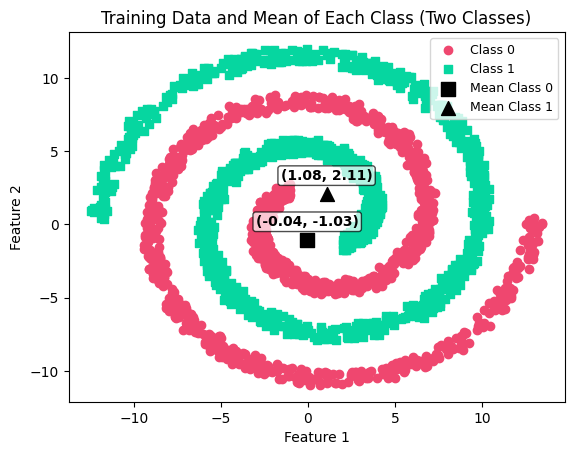

In [ ]:
class_0 = X_train[y_train == 0]
class_1 = X_train[y_train == 1]
# Assuming you have class_0 and class_1 based on your two-class dataset
# Calculate the mean of each class
mean_class_0 = class_0.mean(axis=0)
mean_class_1 = class_1.mean(axis=0)

# Plot the data and the mean for each class
plt.scatter(class_0['Feature 1'], class_0['Feature 2'], color='#ef476f', label='Class 0', marker='o')
plt.scatter(class_1['Feature 1'], class_1['Feature 2'], color='#06d6a0', label='Class 1', marker='s')

plt.scatter(mean_class_0['Feature 1'], mean_class_0['Feature 2'], color='black', marker='s', label='Mean Class 0', s=100)
plt.scatter(mean_class_1['Feature 1'], mean_class_1['Feature 2'], color='black', marker='^', label='Mean Class 1', s=100)

plt.annotate(f"({round(mean_class_0['Feature 1'], 2)}, {round(mean_class_0['Feature 2'], 2)})",
             xy=(mean_class_0['Feature 1'], mean_class_0['Feature 2']),
             textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))
plt.annotate(f"({round(mean_class_1['Feature 1'], 2)}, {round(mean_class_1['Feature 2'], 2)})",
             xy=(mean_class_1['Feature 1'], mean_class_1['Feature 2']),
             textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold',
             fontsize=10, bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data and Mean of Each Class (Two Classes)')
plt.legend(fontsize=9)
plt.show()


#**Classifiers**

##*Nearest Neighbour Classifier*

###Model

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a k-NN classifier with your chosen k value
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the validation data
y_validation_pred = knn_classifier.predict(X_validation)

# Calculate accuracy on the validation data
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy}")

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Calculate precision for every class
precision_per_class = precision_score(y_test, y_test_pred, average=None)

# Calculate mean precision
mean_precision = np.mean(precision_per_class)
print("Precision for each class:")
print(precision_per_class)
print(f"Mean Precision: {mean_precision}")

# Calculate recall for every class
recall_per_class = recall_score(y_test, y_test_pred, average=None)

# Calculate mean recall
mean_recall = np.mean(recall_per_class)
print("\nRecall for each class:")
print(recall_per_class)
print(f"Mean Recall: {mean_recall}")

# Calculate F1-score for every class
f1_score_per_class = f1_score(y_test, y_test_pred, average=None)

# Calculate mean F1-score
mean_f1_score = np.mean(f1_score_per_class)
print("\nF1-score for each class:")
print(f1_score_per_class)
print(f"Mean F1-score: {mean_f1_score}")

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

print("\nConfusion Matrix (in percentage):")
print(conf_matrix_percentage)



Test Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0
Precision for each class:
[1. 1.]
Mean Precision: 1.0

Recall for each class:
[1. 1.]
Mean Recall: 1.0

F1-score for each class:
[1. 1.]
Mean F1-score: 1.0

Confusion Matrix (in percentage):
[[100.   0.]
 [  0. 100.]]


###Decision Region Plots

In [ ]:
# Define custom colors
colors = ['#ef476f', '#06d6a0']

# Create a custom colormap using LinearSegmentedColormap
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


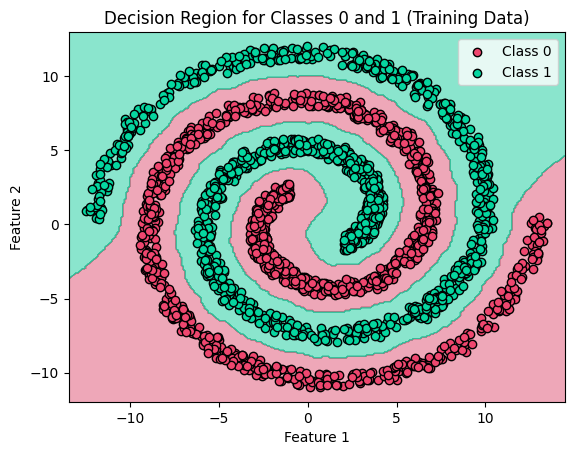

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


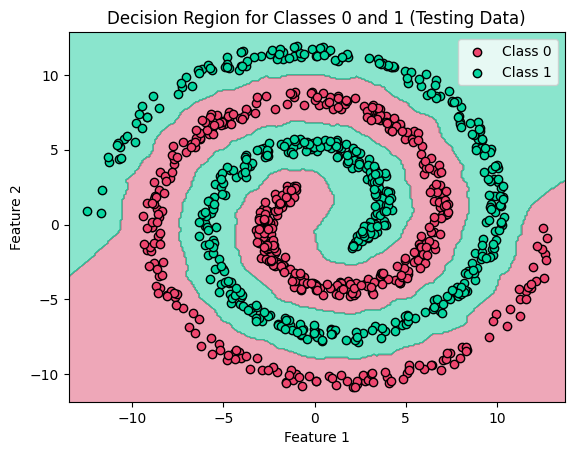

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Create a k-NN classifier with your chosen k value
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Create a color map for the decision boundary plot
# cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
Xtest_class_0 = X_test[y_test == 0].values
Xtest_class_1 = X_test[y_test == 1].values
# Create a color map for scatter points
# cmap_scatter = ListedColormap(['#FF0000', '#0000FF'])

def plot_decision_region_two_classes(X, y, class1, class2, choice):
    # Train the classifier on the training data for the two classes
    knn_classifier.fit(X[(y == class1) | (y == class2)], y[(y == class1) | (y == class2)])

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)



    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)

    plt.scatter(X[y == class1].iloc[:, 0], X[y == class1].iloc[:, 1], c='#ef476f', marker='o', label='Class 0', edgecolor='k')
    plt.scatter(X[y == class2].iloc[:, 0], X[y == class2].iloc[:, 1], c='#06d6a0', marker='o', label='Class 1', edgecolor='k')


    # Plot the training data points for the two classes with distinct colors
    # plt.scatter(Xtest_class_0[:, 0], Xtest_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
    # plt.scatter(Xtest_class_1[:, 0], Xtest_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
    # plt.scatter(X[y == class1].iloc[:, 0], X[y == class1].iloc[:, 1], c='#ef476f', marker='o', label=f'Class {class1}', cmap=cmap_scatter,edgecolor='k')
    # plt.scatter(X[y == class2].iloc[:, 0], X[y == class2].iloc[:, 1], c='#06d6a0', marker='o', label=f'Class {class2}', cmap=cmap_scatter,edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    if choice:
        plt.title(f'Decision Region for Classes {class1} and {class2} (Training Data)')
    else:
        plt.title(f'Decision Region for Classes {class1} and {class2} (Testing Data)')

    plt.legend(loc='upper right')
    plt.show()

# Call the function to plot decision region for two classes
plot_decision_region_two_classes(X_train, y_train, class1=0, class2=1, choice=True)
plot_decision_region_two_classes(X_test, y_test, class1=0, class2=1, choice=False)


##*K-Nearest Neighbours Classifier*

###Model

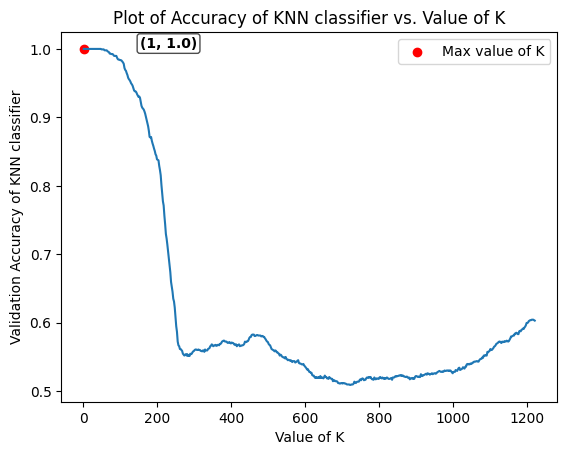

Optimal k: 1
Maximum validation accuracy at this k: 1.0


In [ ]:
acc = []
k = []
no_of_classes = 2
k_val = 0
for i in range(1, len(X_train)//2, 2):
    # Create a k-NN classifier with your chosen k value
    knn_classifier = KNeighborsClassifier(n_neighbors=i)

    # Train the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the validation data
    y_validation_pred = knn_classifier.predict(X_validation)

    # Calculate accuracy on the validation data
    validation_accuracy = accuracy_score(y_validation, y_validation_pred)
    acc.append(validation_accuracy)
    k.append(i)
# Find the index of the maximum accuracy
max_accuracy_index = acc.index(max(acc))

# Get the value of k for the maximum accuracy
optimal_k = k[max_accuracy_index]
plt.plot(k, acc)
plt.xlabel('Value of K')
plt.ylabel('Validation Accuracy of KNN classifier')
plt.scatter(optimal_k, acc[max_accuracy_index], color='red', marker='o', label='Max value of K')
plt.annotate(f"({optimal_k}, {acc[max_accuracy_index]})",
             xy=(optimal_k, acc[max_accuracy_index]),  # Position of the arrow
             xycoords='data',  # Coordinate system for xy
             textcoords="offset points",
             xytext=(optimal_k+60, acc[max_accuracy_index]-0.025),  # Position of the text (offset from arrow)
             ha='center',
             fontweight='bold',
             fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.2'))
plt.title('Plot of Accuracy of KNN classifier vs. Value of K')
plt.legend()
# Display the plot
plt.show()
# find the max here
# Print the optimal k and its corresponding accuracy
print("Optimal k:", optimal_k)
print("Maximum validation accuracy at this k:", acc[max_accuracy_index])

In [ ]:
# Create a k-NN classifier with your chosen k value
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = knn_classifier.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the validation data
y_validation_pred = knn_classifier.predict(X_validation)

# Calculate accuracy on the validation data
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Validation Accuracy: {validation_accuracy}")

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

# Calculate precision for every class
precision_per_class = precision_score(y_test, y_test_pred, average=None)

# Calculate mean precision
mean_precision = np.mean(precision_per_class)
print("Precision for each class:")
print(precision_per_class)
print(f"Mean Precision: {mean_precision}")

# Calculate recall for every class
recall_per_class = recall_score(y_test, y_test_pred, average=None)

# Calculate mean recall
mean_recall = np.mean(recall_per_class)
print("\nRecall for each class:")
print(recall_per_class)
print(f"Mean Recall: {mean_recall}")

# Calculate F1-score for every class
f1_score_per_class = f1_score(y_test, y_test_pred, average=None)

# Calculate mean F1-score
mean_f1_score = np.mean(f1_score_per_class)
print("\nF1-score for each class:")
print(f1_score_per_class)
print(f"Mean F1-score: {mean_f1_score}")

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

print("\nConfusion Matrix (in percentage):")
print(conf_matrix_percentage)


Test Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0
Precision for each class:
[1. 1.]
Mean Precision: 1.0

Recall for each class:
[1. 1.]
Mean Recall: 1.0

F1-score for each class:
[1. 1.]
Mean F1-score: 1.0

Confusion Matrix (in percentage):
[[100.   0.]
 [  0. 100.]]


###Decision Region Plots

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


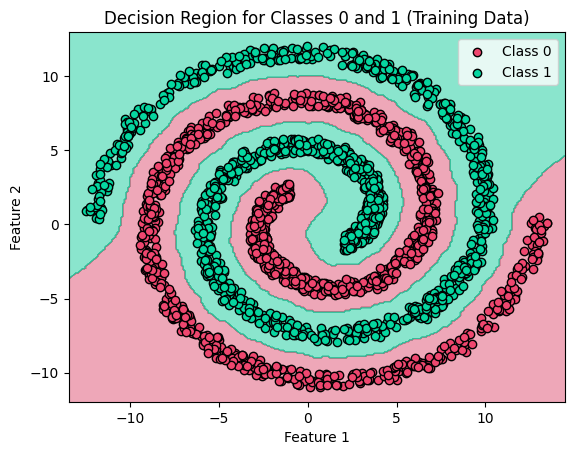

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


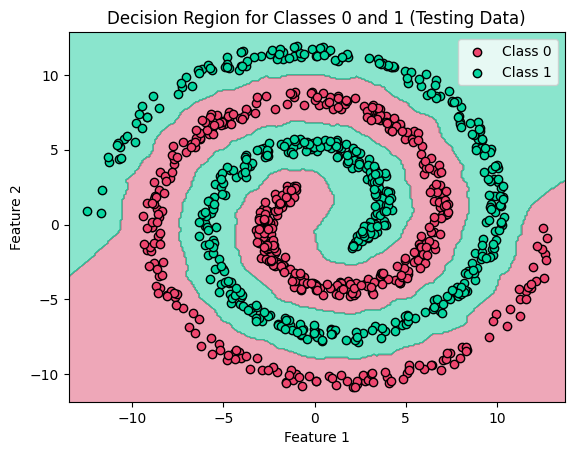

In [ ]:
# Create a k-NN classifier with your chosen k value
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# Create a color map for the decision boundary plot
# cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

# Create a color map for scatter points
# cmap_scatter = ListedColormap(['#FF0000', '#0000FF'])

def plot_decision_region_two_classes(X, y, class1, class2, choice):
    # Train the classifier on the training data for the two classes
    knn_classifier.fit(X[(y == class1) | (y == class2)], y[(y == class1) | (y == class2)])

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the class labels for each point in the mesh grid
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    mesh_labels = knn_classifier.predict(mesh_data)
    mesh_labels = mesh_labels.reshape(xx.shape)



    # Plot the decision boundary
    plt.contourf(xx, yy, mesh_labels, cmap=custom_cmap, alpha=0.5)

    # Plot the training data points for the two classes with distinct colors
    # plt.scatter(Xtest_class_0[:, 0], Xtest_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
    # plt.scatter(Xtest_class_1[:, 0], Xtest_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
    plt.scatter(X[y == class1].iloc[:, 0], X[y == class1].iloc[:, 1], c='#ef476f', marker='o', label='Class 0', edgecolor='k')
    plt.scatter(X[y == class2].iloc[:, 0], X[y == class2].iloc[:, 1], c='#06d6a0', marker='o', label='Class 1', edgecolor='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    if choice:
        plt.title(f'Decision Region for Classes {class1} and {class2} (Training Data)')
    else:
        plt.title(f'Decision Region for Classes {class1} and {class2} (Testing Data)')

    plt.legend(loc='upper right')
    plt.show()

# Call the function to plot decision region for two classes
plot_decision_region_two_classes(X_train, y_train, class1=0, class2=1, choice=True)
plot_decision_region_two_classes(X_test, y_test, class1=0, class2=1, choice=False)


##*Sample Mean Based Classifier*






###Model

In [ ]:
# Convert data to numeric types
def convert_to_numeric(data):
    try:
        return data.astype(float)
    except ValueError:
        # If conversion to float fails, try removing non-numeric rows (e.g., header)
        return data[1:].astype(float)

# Your mean_based_reference_classifier function
def mean_based_reference_classifier(Xtrain, ytrain, new_data_point):
    # Get unique class labels
    unique_classes = np.unique(ytrain)

    # Initialize an empty dictionary to store class reference templates
    reference_templates = {}

    # Create reference templates for each class
    for class_label in unique_classes:
        class_samples = Xtrain[ytrain == class_label]
        mean_template = np.mean(class_samples, axis=0)
        reference_templates[class_label] = mean_template
    min_distance = float('inf')
    predicted_class = None
    for class_label, reference_template in reference_templates.items():
        distance = np.linalg.norm(new_data_point - reference_template)

        if distance < min_distance:
            min_distance = distance
            predicted_class = class_label

    return predicted_class

# Exclude the first row from X_train
Xtrain = X_train.iloc[1:]

# Assuming y_train is also a pandas Series, you can exclude the first row similarly
ytrain = y_train.iloc[1:]

# Step 2: Predict labels on training data
train_predictions = [mean_based_reference_classifier(Xtrain.values, ytrain.values, datapoint) for datapoint in Xtrain.values]

# Step 3: Calculate training accuracy
train_accuracy = accuracy_score(ytrain.values, train_predictions)

# Assuming X_test and y_test have similar structures, you can exclude the first row similarly
Xtest = X_test.iloc[1:]
ytest = y_test.iloc[1:]

# Step 4: Predict labels on test data
test_predictions = [mean_based_reference_classifier(Xtest.values, ytest.values, datapoint) for datapoint in Xtest.values]

# Step 5: Calculate test accuracy
test_accuracy = accuracy_score(ytest.values, test_predictions)

# Step 6: Calculate precision for every class
precision_per_class = precision_score(ytest.values, test_predictions, average=None)

# Step 7: Calculate mean precision
mean_precision = np.mean(precision_per_class)

# Step 8: Calculate recall for every class
recall_per_class = recall_score(ytest.values, test_predictions, average=None)

# Step 9: Calculate mean recall
mean_recall = np.mean(recall_per_class)

# Step 10: Calculate F-measure (F1-score) for every class
f1_score_per_class = f1_score(ytest.values, test_predictions, average=None)

# Step 11: Calculate mean F-measure
mean_f1_score = np.mean(f1_score_per_class)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision for Each Class:", precision_per_class)
print("Mean Precision:", mean_precision)
print("Recall for Each Class:", recall_per_class)
print("Mean Recall:", mean_recall)
print("F-measure for Each Class:", f1_score_per_class)
print("Mean F-measure:", mean_f1_score)



# Step 12: Calculate the confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, test_predictions)
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix_percentage)


Training Accuracy: 0.6255110384300899
Test Accuracy: 0.6352459016393442
Precision for Each Class: [0.63580247 0.63469388]
Mean Precision: 0.6352481733434114
Recall for Each Class: [0.63319672 0.63729508]
Mean Recall: 0.6352459016393442
F-measure for Each Class: [0.63449692 0.63599182]
Mean F-measure: 0.6352443699793822
Confusion Matrix (in percentage):
[[63.31967213 36.68032787]
 [36.2704918  63.7295082 ]]


###Decision Region Plots

<Figure size 600x400 with 0 Axes>

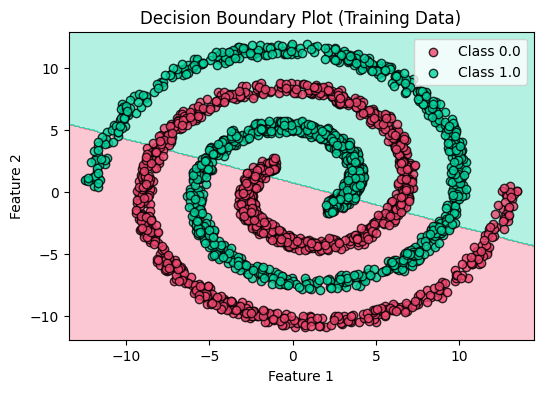

<Figure size 600x400 with 0 Axes>

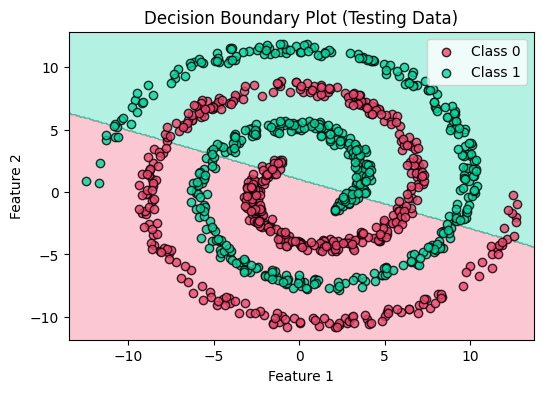

In [ ]:
# Create a mesh grid for plotting the decision boundary
colors = ['#ef476f', '#06d6a0']
cmap = ListedColormap(colors)

def plot_decision_boundary(X, y, classifier, resolution=0.1, ax=None, legend_flag=True, class1=None, class2=None):
    # Plot setup
    markers = ('o', 'o')

    if ax is None:
        plt.figure(figsize=(6, 4))
        ax = plt.gca()

    # Get plot axes boundaries
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Classify each point in the mesh grid
    mesh_points = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([classifier(X, y, point) for point in mesh_points])
    Z = Z.reshape(xx1.shape)

    # Plot contour plot for decision boundary
    ax.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)

    # Plot class points
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                   alpha=0.8, c=[colors[idx]],
                   marker=markers[idx], label=f'Class {cl}', edgecolor='black')

    if legend_flag:
        ax.legend()

# Assuming X_train and y_train are already prepared
# Convert to numeric types
X_train = convert_to_numeric(X_train)
y_train = convert_to_numeric(y_train)

# Train the classifier (assuming you have a mean_based_reference_classifier function)

# Plot the decision boundary with training data superimposed
plt.figure(figsize=(6, 4))
plot_decision_boundary(X_train.values, y_train.values, mean_based_reference_classifier)

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary Plot (Training Data)')

# Show legend
plt.legend()

# Show the plot
plt.show()

# Plot the decision boundary with testing data superimposed
plt.figure(figsize=(6, 4))
plot_decision_boundary(X_test.values, y_test.values, mean_based_reference_classifier)

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary Plot (Testing Data)')

# Show legend
plt.legend()

# Show the plot
plt.show()


##*Sample Mean and Sample Covariance Matrix Based Classifier*

###Model

In [ ]:
mean_vectors = {}
cov_matrices = {}
for label in train_df['Label'].unique():
    class_data = X_train[y_train == label]
    mean_vectors[label] = class_data.mean()
    cov_matrices[label] = np.cov(class_data, rowvar=False)

# Define a function to classify a data point using the Mahalanobis distance
def classify_mean_vector(data_point, mean_vectors, cov_matrices):
    class_distances = {}
    for label, mean_vector in mean_vectors.items():
        cov_matrix = cov_matrices[label]
        dist = distance.mahalanobis(data_point, mean_vector, cov_matrix)
        class_distances[label] = dist
    return min(class_distances, key=class_distances.get)

# Create a meshgrid for the decision boundary visualization
x_min, x_max = X_train['Feature 1'].min() - 1, X_train['Feature 1'].max() + 1
y_min, y_max = X_train['Feature 2'].min() - 1, X_train['Feature 2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.08),
                     np.arange(y_min, y_max, 0.08))

# Initialize lists to store predictions for df_test and df_val
y_test_pred = []
y_val_pred = []

# Initialize a matrix for decision boundary visualization
decision_boundary_matrix = np.zeros(xx.shape)

# Classify data points in df_test and populate the decision boundary matrix
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        data_point = np.array([xx[i, j], yy[i, j]])
        predicted_class = classify_mean_vector(data_point, mean_vectors, cov_matrices)
        decision_boundary_matrix[i, j] = predicted_class

# Classify data points in df_test and df_val
for _, row in X_test.iterrows():
    data_point = row.values
    predicted_class = classify_mean_vector(data_point, mean_vectors, cov_matrices)
    y_test_pred.append(predicted_class)

for _, row in X_validation.iterrows():
    data_point = row.values
    predicted_class = classify_mean_vector(data_point, mean_vectors, cov_matrices)
    y_val_pred.append(predicted_class)

# Convert the predictions to NumPy arrays
y_test_pred = np.array(y_test_pred)
y_val_pred = np.array(y_val_pred)

# Calculate accuracy for df_test and df_val
accuracy_test = (y_test_pred == y_test).mean()
accuracy_val = (y_val_pred == y_validation).mean()

print("Test accuracy: ", accuracy_test)
print("Validation accuracy: ", accuracy_val)

# Calculate precision, recall, and F1-score for every class on the test data
precision_per_class = precision_score(y_test, y_test_pred, average=None)
recall_per_class = recall_score(y_test, y_test_pred, average=None)
f1_score_per_class = f1_score(y_test, y_test_pred, average=None)

# Calculate mean precision, recall, and F1-score
mean_precision = np.mean(precision_per_class)
mean_recall = np.mean(recall_per_class)
mean_f1_score = np.mean(f1_score_per_class)

print("\nPrecision for each class (Test Data):", precision_per_class)
print("Mean Precision (Test Data):", mean_precision)
print("\nRecall for each class (Test Data):", recall_per_class)
print("Mean Recall (Test Data):", mean_recall)
print("\nF1-score for each class (Test Data):", f1_score_per_class)
print("Mean F1-score (Test Data):", mean_f1_score)

# Calculate confusion matrix for test data in percentage
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_percentage = (conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]) * 100

print("\nConfusion Matrix (in percentage) for Test Data:")
print(conf_matrix_percentage)

Test accuracy:  0.6325486182190379
Validation accuracy:  0.6228727025187202

Precision for each class (Test Data): [0.63771186 0.62772277]
Mean Precision (Test Data): 0.6327173183420036

Recall for each class (Test Data): [0.61554192 0.64959016]
Mean Recall (Test Data): 0.6325660431124074

F1-score for each class (Test Data): [0.6264308  0.63846928]
Mean F1-score (Test Data): 0.6324500431218321

Confusion Matrix (in percentage) for Test Data:
[[61.55419223 38.44580777]
 [35.04098361 64.95901639]]


###Decision Region Plots

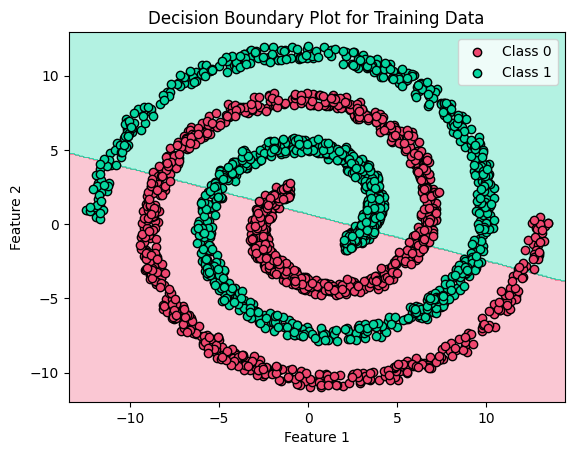

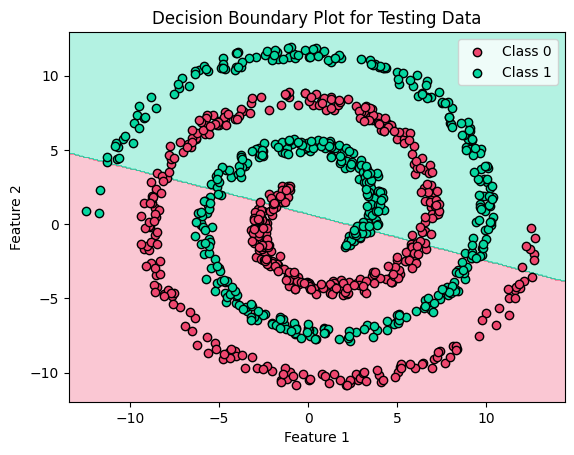

In [ ]:
# Function to plot decision boundary with data and class labels
cmap = ListedColormap(colors)
def plot_decision_boundary_with_data(X, y, decision_boundary_matrix, class_labels, title):
    plt.contourf(xx, yy, decision_boundary_matrix, alpha=0.3, cmap=cmap)

    # Plot each class separately with a label
    for label, color in zip(np.unique(y), colors):
        class_data = X[y == label]
        plt.scatter(class_data[:, 0], class_data[:, 1], color=color, label=class_labels[label], edgecolor='black')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.show()

# Define class labels
class_labels = {0: 'Class 0', 1: 'Class 1'}

# Plot decision boundary for training data
plot_decision_boundary_with_data(X_train.values, y_train.values, decision_boundary_matrix, class_labels, 'Decision Boundary Plot for Training Data')

# Plot decision boundary for testing data
plot_decision_boundary_with_data(X_test.values, y_test.values, decision_boundary_matrix, class_labels, 'Decision Boundary Plot for Testing Data')


##*Bayesian Classifier-Unimodal Gaussian Density*


###Case 1 - Covariance matrix for all classes is same and is σ²I

####Model

In [ ]:
from scipy.stats import multivariate_normal

var = (cov_matrices[0][0][0]+cov_matrices[1][0][0]+cov_matrices[0][1][1]+cov_matrices[1][1][1])/4
cov_mat = [[var, 0], [0, var]]

# Calculate mean and covariance matrix for each class
mean_class_1 = [mean_vectors[0][0], mean_vectors[0][1]]
covariance_class_1 = cov_mat

mean_class_2 = [mean_vectors[1][0], mean_vectors[1][1]]
covariance_class_2 = cov_mat



# Define the Multivariate Gaussian Density Function
def gaussian_density(x, mean, covariance):
    return multivariate_normal.pdf(x, mean=mean, cov=covariance)

# Bayes classifier using Multivariate Gaussian densities
def bayes_classifier(x, mean1, covariance1, mean2, covariance2):
    likelihood_class_1 = gaussian_density(x, mean1, covariance1)
    likelihood_class_2 = gaussian_density(x, mean2, covariance2)


    if likelihood_class_1 > likelihood_class_2:
        return 0  # Class 1

    else:
        return 1  # Class 2

predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in Xtest.values]

accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)

# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Calculate mean precision, mean recall, and mean F1-score
mean_precision = precision_per_class.mean()
mean_recall = recall_per_class.mean()
mean_f1 = f1_per_class.mean()

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix_percentage)



Test Accuracy: 0.6311475409836066
Precision per class: [0.63445378 0.628     ]
Recall per class: [0.61885246 0.64344262]
F1-score per class: [0.62655602 0.63562753]
Mean Precision: 0.6312268907563026
Mean Recall: 0.6311475409836065
Mean F1-score: 0.6310917734809414
Confusion Matrix (in percentage):
[[61.8852459 38.1147541]
 [35.6557377 64.3442623]]


####Decision Region Plots

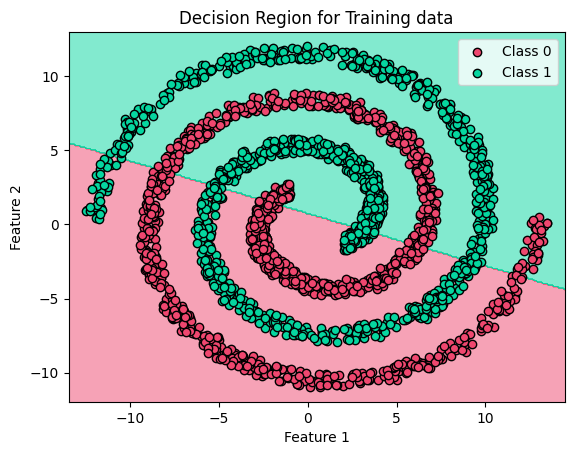

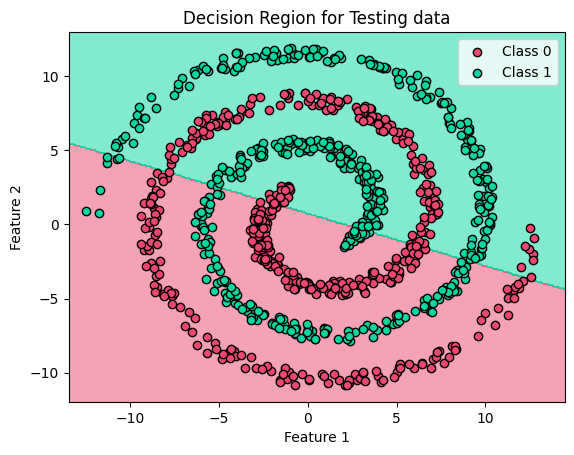

In [ ]:
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtrain_class_0 = Xtrain[ytrain == 0].values
Xtrain_class_1 = Xtrain[ytrain == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtrain_class_0[:, 0], Xtrain_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtrain_class_1[:, 0], Xtrain_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Training data')
plt.legend()
plt.show()



#for test data
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtest_class_0 = Xtest[ytest == 0].values
Xtest_class_1 = Xtest[ytest == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtest_class_0[:, 0], Xtest_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtest_class_1[:, 0], Xtest_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Testing data')
plt.legend()
plt.show()




###Case 2 - Full covariance matrix for all the classes and is same for all the classes







####*1) Same covariance matrix for all the classes obtained by taking average of covariance matrices of all the classes*

#####Model

In [ ]:
cov_mat1 = (cov_matrices[0]+cov_matrices[1])/2
covariance_class_1 = cov_mat1
covariance_class_2 = cov_mat1


predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in Xtest.values]
accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)


# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Calculate mean precision, mean recall, and mean F1-score
mean_precision = precision_per_class.mean()
mean_recall = recall_per_class.mean()
mean_f1 = f1_per_class.mean()

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix_percentage)

Test Accuracy: 0.6311475409836066
Precision per class: [0.6350211  0.62749004]
Recall per class: [0.61680328 0.6454918 ]
F1-score per class: [0.62577963 0.63636364]
Mean Precision: 0.6312555684435255
Mean Recall: 0.6311475409836065
Mean F1-score: 0.631071631071631
Confusion Matrix (in percentage):
[[61.68032787 38.31967213]
 [35.45081967 64.54918033]]


#####Decision Region Plots

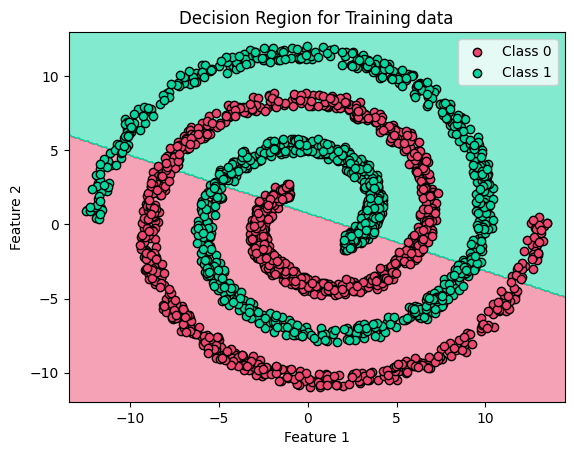

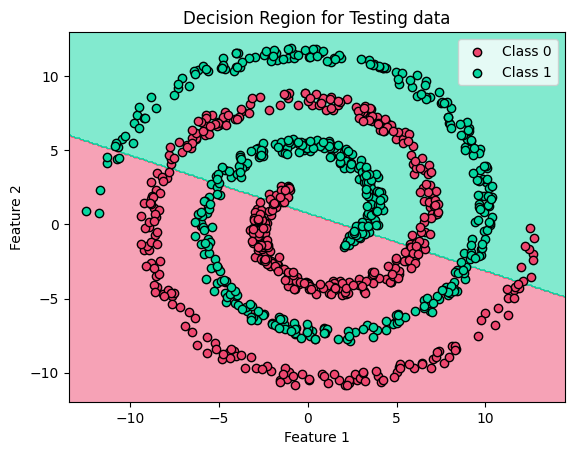

In [ ]:
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtrain_class_0 = Xtrain[ytrain == 0].values
Xtrain_class_1 = Xtrain[ytrain == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtrain_class_0[:, 0], Xtrain_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtrain_class_1[:, 0], Xtrain_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Training data')
plt.legend()
plt.show()



#for test data
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtest_class_0 = Xtest[ytest == 0].values
Xtest_class_1 = Xtest[ytest == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtest_class_0[:, 0], Xtest_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtest_class_1[:, 0], Xtest_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Testing data')
plt.legend()
plt.show()




####*2) Same covariance matrix for all the classes by computing the covariance matrix of training data of all the classes combined.*

#####Model

In [ ]:
combined_df = pd.concat([Xtrain, ytrain], axis=1)
features = combined_df[['Feature 1', 'Feature 2']].values
covariance_combined = np.cov(features, rowvar=False)
covariance_class_1 = covariance_combined
covariance_class_2 = covariance_combined

predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in Xtest.values]
accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)

# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Calculate mean precision, mean recall, and mean F1-score
mean_precision = precision_per_class.mean()
mean_recall = recall_per_class.mean()
mean_f1 = f1_per_class.mean()

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix_percentage)

Test Accuracy: 0.6311475409836066
Precision per class: [0.6350211  0.62749004]
Recall per class: [0.61680328 0.6454918 ]
F1-score per class: [0.62577963 0.63636364]
Mean Precision: 0.6312555684435255
Mean Recall: 0.6311475409836065
Mean F1-score: 0.631071631071631
Confusion Matrix (in percentage):
[[61.68032787 38.31967213]
 [35.45081967 64.54918033]]


#####Decision Region Plots

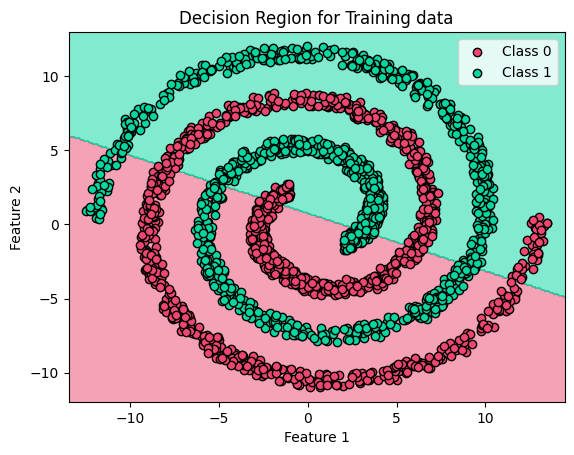

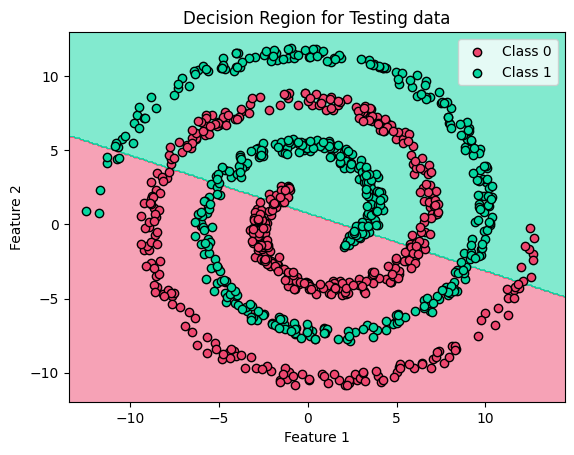

In [ ]:
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtrain_class_0 = Xtrain[ytrain == 0].values
Xtrain_class_1 = Xtrain[ytrain == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtrain_class_0[:, 0], Xtrain_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtrain_class_1[:, 0], Xtrain_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Training data')
plt.legend()
plt.show()



#for test data
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtest_class_0 = Xtest[ytest == 0].values
Xtest_class_1 = Xtest[ytest == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtest_class_0[:, 0], Xtest_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtest_class_1[:, 0], Xtest_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Testing data')
plt.legend()
plt.show()




###Case 3 - Covariance matrix is diagonal and is different for each class

####Model

In [ ]:
covariance_class_1 = [[cov_matrices[0][0][0], 0], [0, cov_matrices[0][1][1]]]
covariance_class_2 = [[cov_matrices[1][0][0], 0], [0, cov_matrices[1][1][1]]]


predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in Xtest.values]
accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)

# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Calculate mean precision, mean recall, and mean F1-score
mean_precision = precision_per_class.mean()
mean_recall = recall_per_class.mean()
mean_f1 = f1_per_class.mean()

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix_percentage)

Test Accuracy: 0.6342213114754098
Precision per class: [0.64025696 0.62868369]
Recall per class: [0.61270492 0.6557377 ]
F1-score per class: [0.62617801 0.64192578]
Mean Precision: 0.6344703264157372
Mean Recall: 0.6342213114754098
Mean F1-score: 0.6340518939016
Confusion Matrix (in percentage):
[[61.2704918  38.7295082 ]
 [34.42622951 65.57377049]]


####Decision Region Plots

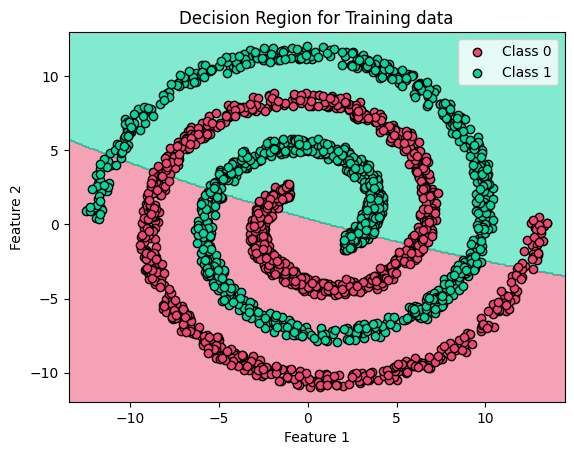

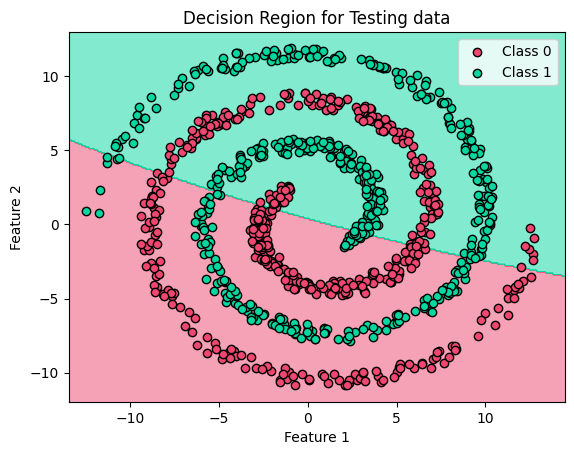

In [ ]:
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtrain_class_0 = Xtrain[ytrain == 0].values
Xtrain_class_1 = Xtrain[ytrain == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtrain_class_0[:, 0], Xtrain_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtrain_class_1[:, 0], Xtrain_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Training data')
plt.legend()
plt.show()



#for test data
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtest_class_0 = Xtest[ytest == 0].values
Xtest_class_1 = Xtest[ytest == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtest_class_0[:, 0], Xtest_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtest_class_1[:, 0], Xtest_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Testing data')
plt.legend()
plt.show()




###Case 4 - Full covariance matrix for each class and is different

####Model

In [ ]:
covariance_class_15 = cov_matrices[0]
covariance_class_25 = cov_matrices[1]


predictions = [bayes_classifier(x, mean_class_1, covariance_class_15, mean_class_2, covariance_class_25) for x in Xtest.values]
accuracy = accuracy_score(ytest.values, predictions)
print("Test Accuracy:", accuracy)

# Calculate precision, recall, and F1-score for each class
precision_per_class = precision_score(ytest.values, predictions, average=None)
recall_per_class = recall_score(ytest.values, predictions, average=None)
f1_per_class = f1_score(ytest.values, predictions, average=None)

# Calculate mean precision, mean recall, and mean F1-score
mean_precision = precision_per_class.mean()
mean_recall = recall_per_class.mean()
mean_f1 = f1_per_class.mean()

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)
print("Mean Precision:", mean_precision)
print("Mean Recall:", mean_recall)
print("Mean F1-score:", mean_f1)

# Calculate confusion matrix in percentage
conf_matrix = confusion_matrix(ytest.values, predictions)
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

print("Confusion Matrix (in percentage):")
print(conf_matrix_percentage)

Test Accuracy: 0.6290983606557377
Precision per class: [0.63938053 0.62022901]
Recall per class: [0.59221311 0.66598361]
F1-score per class: [0.61489362 0.64229249]
Mean Precision: 0.6298047693035196
Mean Recall: 0.6290983606557377
Mean F1-score: 0.6285930535699269
Confusion Matrix (in percentage):
[[59.22131148 40.77868852]
 [33.40163934 66.59836066]]


####Decision Region Plots

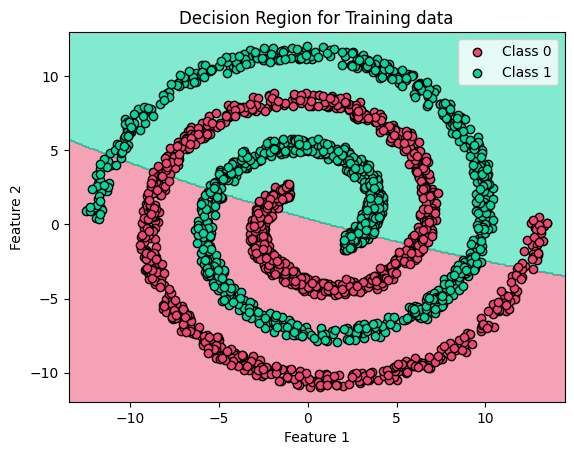

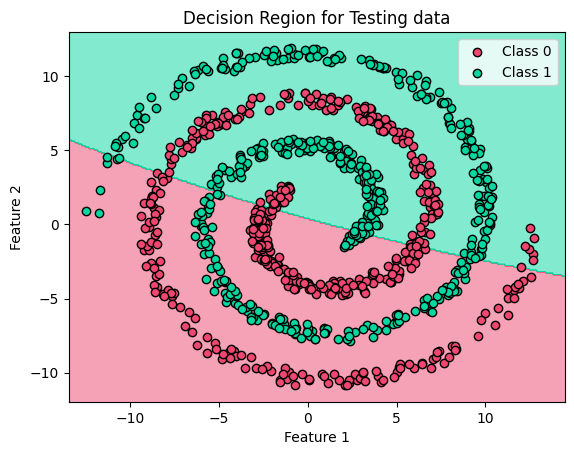

In [ ]:
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtrain_class_0 = Xtrain[ytrain == 0].values
Xtrain_class_1 = Xtrain[ytrain == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtrain_class_0[:, 0], Xtrain_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtrain_class_1[:, 0], Xtrain_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Training data')
plt.legend()
plt.show()



#for test data
# Generate a mesh grid of points
x_min, x_max = Xtrain.iloc[:, 0].min() - 1, Xtrain.iloc[:, 0].max() + 1
y_min, y_max = Xtrain.iloc[:, 1].min() - 1, Xtrain.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the mesh grid
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predictions = [bayes_classifier(x, mean_class_1, covariance_class_1, mean_class_2, covariance_class_2) for x in mesh_points]
mesh_predictions = np.array(mesh_predictions).reshape(xx.shape)

Xtest_class_0 = Xtest[ytest == 0].values
Xtest_class_1 = Xtest[ytest == 1].values
# Xtrain_class_2 = Xtrain[ytrain == 2].values

# Plot the decision boundary
plt.contourf(xx, yy, mesh_predictions, alpha=0.5, cmap=ListedColormap(('#ef476f',  '#06d6a0')))

# Plot the training points
plt.scatter(Xtest_class_0[:, 0], Xtest_class_0[:, 1], color='#ef476f', label='Class 0', edgecolor='black', marker='o')
plt.scatter(Xtest_class_1[:, 0], Xtest_class_1[:, 1], color='#06d6a0', label='Class 1', edgecolor='black', marker='o')
# plt.scatter(Xtrain_class_2[:, 0], Xtrain_class_2[:, 1], color='green', label='Class 2', edgecolor='black', marker='+')


# Customize plot
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Region for Testing data')
plt.legend()
plt.show()


